In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from scipy.spatial import transform


In [14]:
track_dict = joblib.load('data/demo_walk_9.pkl')

In [15]:
#remove first element in track_dict
list(track_dict.keys())
track_dict.pop(list(track_dict.keys())[0])

{'time': 0,
 'shot': 0,
 'frame_path': 'outputs//_DEMO/walk_9/img/000001.jpg',
 'tracked_ids': [1],
 'tracked_bbox': [array([740.62366,  89.96479,  98.80328, 366.8655 ], dtype=float32)],
 'tid': [1],
 'bbox': [array([740.62366,  89.96479,  98.80328, 366.8655 ], dtype=float32)],
 'tracked_time': [0],
 'appe': [array([13.011716 ,  5.9197555,  6.8680964, ..., 14.114229 , 11.342671 ,
          7.932956 ], dtype=float32)],
 'loca': [array([ 0.8754562 ,  0.3687355 ,  0.91591734,  0.38633132,  0.89487296,
          0.41478622,  0.8971095 ,  0.47863263,  0.88621604,  0.54002464,
          0.94477296,  0.41125655,  0.9656168 ,  0.47420624,  0.9616965 ,
          0.5363104 ,  0.9174725 ,  0.5133834 ,  0.9102914 ,  0.5364126 ,
          0.92546   ,  0.6322799 ,  0.94877243,  0.7309056 ,  0.9251251 ,
          0.53585565,  0.88810444,  0.62030894,  0.926617  ,  0.71242815,
          0.87691945,  0.35693085,  0.8833824 ,  0.35655364,  0.89472306,
          0.35415196,  0.9088534 ,  0.3534209 ,  0.8

In [16]:
frames = list(track_dict.keys())
print(frames[0])

outputs//_DEMO/walk_9/img/000002.jpg


In [17]:
params = list(track_dict.get(frames[0]).keys())

In [18]:
joints_2d = track_dict.get(frames[0]).get('smpl')

In [19]:
joints_2d

[{'global_orient': array([[[ 0.3539928 ,  0.06581085, -0.93292993],
          [-0.00675271, -0.99731535, -0.072915  ],
          [-0.9352238 ,  0.03211119, -0.35259804]]], dtype=float32),
  'body_pose': array([[[ 9.96266127e-01,  3.70126292e-02, -7.79985413e-02],
          [-3.01370444e-03,  9.17800725e-01,  3.97029847e-01],
          [ 8.62822309e-02, -3.95312369e-01,  9.14485335e-01]],
  
         [[ 9.93029535e-01, -8.17491189e-02, -8.49085152e-02],
          [ 4.95942384e-02,  9.43308890e-01, -3.28190058e-01],
          [ 1.06924206e-01,  3.21691424e-01,  9.40787852e-01]],
  
         [[ 9.91331041e-01,  3.60217355e-02,  1.26353651e-01],
          [-1.61696784e-02,  9.87820923e-01, -1.54752403e-01],
          [-1.30389243e-01,  1.51367754e-01,  9.79839981e-01]],
  
         [[ 9.97099280e-01,  7.61116296e-02, -4.82491632e-05],
          [-6.92007244e-02,  9.06298637e-01, -4.16933954e-01],
          [-3.16898003e-02,  4.15727913e-01,  9.08936679e-01]],
  
         [[ 9.71072078e-01,

In [20]:

def get_2d_joints(dict):
    frames = list(dict.keys())
    joints_2d = []
    for frame in frames:
        joints_2d.append(dict.get(frame).get('2d_joints'))
    
    #reshape to (frames, 90)
    joints_2d = np.array(joints_2d)
    joints_2d = joints_2d.reshape(joints_2d.shape[0], -1)
    
    return np.array(joints_2d)

def get_smpl(dict):
    frames = list(dict.keys())
    joints_2d = []
    for frame in frames:
        joints_2d.append(dict.get(frame).get('smpl')[0])
    
    return np.array(joints_2d)

def get_cameras(dict):
    frames = list(dict.keys())
    joints_2d = []
    for frame in frames:
        joints_2d.append(dict.get(frame).get('camera'))
    
    return np.array(joints_2d)

In [21]:
# smpl_frames = np.array([get_smpl(dict)[i]['body_pose'][7] for i in range(len(get_smpl(dict)))])

# joints = [smpl_frames[i] for i in range(len(smpl_frames))]

# # smpl = get_smpl(dict)[0]['body_pose']
# # smpl[7]
# # print(joints)

# joints_x = []
# joints_y = []
# joints_z = []

# for i in range(len(joints)):
#     r = transform.Rotation.from_matrix(joints[i])
#     r = r.as_euler('xyz', degrees=False)
    
#     joints_x.append(r[0])
#     joints_y.append(r[1])
#     joints_z.append(r[2])
    
# plt.plot(joints)
# plt.show()

In [22]:
smpl_frames = np.array([get_smpl(track_dict)[i]['body_pose'] for i in range(len(get_smpl(track_dict)))])

smpl_joint_frames = []

for frame in smpl_frames:
    
    joints_x = []
    joints_y = []
    joints_z = []
    
    for joint in frame:
        r = transform.Rotation.from_matrix(joint)
        r = r.as_euler('xyz', degrees=False)

        joints_x.append(r[0])
        joints_y.append(r[1])
        joints_z.append(r[2])
    
    smpl_joint_frames.append([joints_x, joints_y, joints_z])

smpl_joint_frames = np.array(smpl_joint_frames)
#reshape to (frames, 23, 3)
# smpl_joint_frames = smpl_joint_frames.reshape(smpl_joint_frames.shape[0], 23, 3)
print(smpl_joint_frames.shape)

(68, 3, 23)


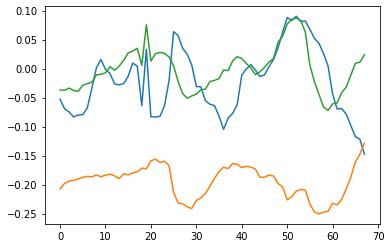

In [23]:
plt.plot(smpl_joint_frames[:, 0, 7])
plt.plot(smpl_joint_frames[:, 1, 7])
plt.plot(smpl_joint_frames[:, 2, 7])


In [24]:
#swap dimensions of smpl_joint_frames to (frames, 23, 3)
smpl_joint_frames = np.swapaxes(smpl_joint_frames, 1, 2)

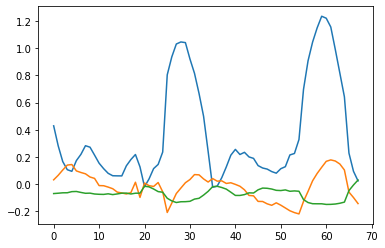

In [25]:
plt.plot(smpl_joint_frames[:, 3, 0])
plt.plot(smpl_joint_frames[:, 3, 1])
plt.plot(smpl_joint_frames[:, 3, 2])

In [26]:
#convert to joints to dataframe, by resizinng to (frames, 23*3)
smpl_joint_frames_df = smpl_joint_frames.reshape(smpl_joint_frames.shape[0], -1)
smpl_joint_frames_df = pd.DataFrame(smpl_joint_frames_df)

#get column names from SMPL model joint names

column_names = []

SMPL_JOINT_NAMES = [
#    "pelvis",
    "left_hip",
    "right_hip",
    "spine1",
    "left_knee",
    "right_knee",
    "spine2",
    "left_ankle",
    "right_ankle",
    "spine3",
    "left_foot",
    "right_foot",
    "neck",
    "left_collar",
    "right_collar",
    "head",
    "left_shoulder",
    "right_shoulder",
    "left_elbow",
    "right_elbow",
    "left_wrist",
    "right_wrist",
    "left_hand",
    "right_hand",
]


for i in SMPL_JOINT_NAMES:
    column_names.append(f'{i}_x')
    column_names.append(f'{i}_y')
    column_names.append(f'{i}_z')

smpl_joint_frames_df.columns = column_names

print(len(column_names))

69


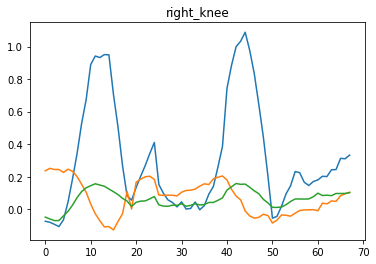

In [27]:

plot_col = 4

plt.plot(smpl_joint_frames_df[f'{SMPL_JOINT_NAMES[plot_col]}_x'])
plt.plot(smpl_joint_frames_df[f'{SMPL_JOINT_NAMES[plot_col]}_y'])
plt.plot(smpl_joint_frames_df[f'{SMPL_JOINT_NAMES[plot_col]}_z'])

plt.title(f'{SMPL_JOINT_NAMES[plot_col]}')

plt.show()

In [28]:
get_cameras(track_dict).shape
#reshape to (frames, 3)
camera_frames = get_cameras(track_dict).reshape(get_cameras(track_dict).shape[0], -1)

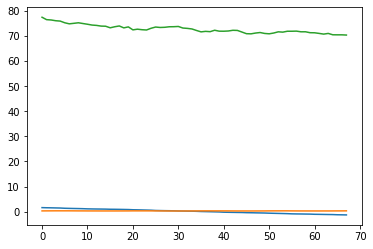

In [31]:
#plot camera frames
plt.plot(camera_frames[:, 0])
plt.plot(camera_frames[:, 1])
plt.plot(camera_frames[:, 2])


In [30]:
track_dict.get(frames[0]).keys()

dict_keys(['time', 'shot', 'frame_path', 'tracked_ids', 'tracked_bbox', 'tid', 'bbox', 'tracked_time', 'appe', 'loca', 'pose', 'center', 'scale', 'size', 'img_path', 'img_name', 'class_name', 'conf', 'annotations', 'smpl', 'camera', 'camera_bbox', '3d_joints', '2d_joints', 'mask', 'extra_data'])